In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import util
import time

In [2]:
folder_path = 'datasets/kaggle_clement/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'
train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

In [3]:
model = Pipeline(steps=[('Tfidf',TfidfVectorizer()),('log', LogisticRegression())])
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

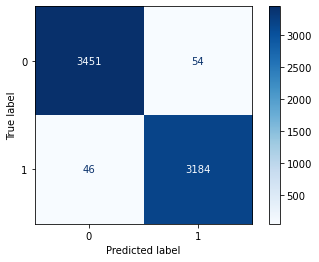

In [4]:
disp = plot_confusion_matrix(model, test_X, test_Y,cmap=plt.cm.Blues)

In [5]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, pred_Y) * 100, 2)) + "%")

Model Accuracy: 98.52%


In [6]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3505
           1       0.98      0.99      0.98      3230

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735



In [ ]:
dual=[True,False]
penalty=['l2']
tol=[1e-3,1e-4]
max_iter=[80,90,100]

param_grid = {
    'log__dual': dual,
    #'log__penalty': penalty,
    'log__max_iter': max_iter
}
grid=RandomizedSearchCV(estimator=model,param_grid=param_grid, n_jobs=5)
start_time = time.time()
grid_result = grid.fit(train_X, train_Y)
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)